In [1]:
import pandas as pd
# modul untuk membagi dataset menjadi data training dan data testing
from sklearn.model_selection import train_test_split
# modul untuk menghitung performa model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
golf = pd.read_csv('golf.csv')
golf.head()

,Cuaca,Temperatur,Kelembaban,Angin,Bermain
0,1,85,85,0,tidak-main
1,1,80,90,1,tidak-main
2,2,83,78,0,main
3,3,70,96,0,main
4,3,68,80,0,main


In [3]:
golf.shape

(14, 5)

In [4]:
golf.columns

Index(['Cuaca', 'Temperatur', 'Kelembaban', 'Angin', 'Bermain'], dtype='object')

In [5]:
golf_data = golf.drop(columns='Bermain')
golf_data.head()

,Cuaca,Temperatur,Kelembaban,Angin
0,1,85,85,0
1,1,80,90,1
2,2,83,78,0
3,3,70,96,0
4,3,68,80,0


In [6]:
golf_target = golf['Bermain']
golf_target.head()

0    tidak-main
1    tidak-main
2          main
3          main
4          main
Name: Bermain, dtype: object

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(golf_data, golf_target, test_size=0.3, random_state=50)

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree_golf = DecisionTreeClassifier(random_state=50)
tree_golf.fit(xtrain, ytrain)

print("Nilai akurasi pada data testing:", tree_golf.score(xtest, ytest))

Nilai akurasi pada data testing: 0.8


In [16]:
from sklearn.tree import export_graphviz

export_graphviz(tree_golf, out_file="tree_golf.dot", class_names=["tidak-main", "main"],
               feature_names=golf_data.columns, impurity=False, filled=True)

#### Jika tidak ada module graphviz, maka:
##### 1. Buka Anaconda Prompt
##### 2. Ketikkan conda install python-graphviz

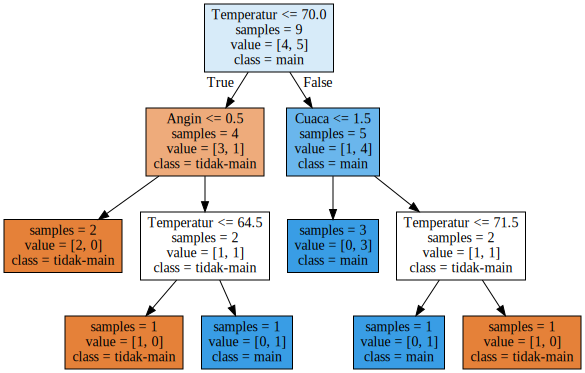

In [17]:
import graphviz

with open("tree_golf.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)